In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt
%matplotlib inline

In [94]:
data = pd.read_csv('https://raw.githubusercontent.com/Pitsillides91/Python-Tutorials/master/Unsupervised%20Learning/Events%20Raw%20Data.csv')

In [3]:
data.head()

,CUSTOMER,Age,Gender,Postcode,District,Constituency,latitude,longitude,Current_Status,Total_Household_Income,How often you attend Entertaining events in a year?,Social_Media,How many hours are you willing to travel to attend an event?,Do you enjoy adrenaline-rush activities?,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?
0,1,40-49,Female,AL9 7BN,Welwyn Hatfield,Welwyn Hatfield,51.727429,-0.183648,Married with children,"50,000 to 74,999",4 Times a Year,Up to 1 hour,3 hours,Entirely disagree,Entirely agree,Ice Bar,Somewhat agree,Somewhat Unlikely,Somewhat disagree
1,2,60-64,Male,AL7 1ZW,Welwyn Hatfield,Welwyn Hatfield,51.804482,-0.195898,Married with children,"35,000 to 49,999",3 Times a Year,Up to 1 hour,5 hours,Somewhat disagree,Entirely agree,Happy Rollercoaster,Mostly agree,Somewhat Likely,Entirely disagree
2,3,50-59,Male,AB4 5JX,Aberdeenshire,Banff and Buchan,57.692200,-2.022295,Married with children,"75,000 to 99,999",3 Times a Year,I don't spend any time at all,5 hours,Somewhat disagree,Somewhat agree,Happy Rollercoaster,Mostly agree,Mostly Unlikely,Entirely disagree
3,4,50-59,Female,B24 0DL,Birmingham,"Birmingham, Erdington",52.526595,-1.822211,Married without children,"35,000 to 49,999",1 Times a Year,Half a day,1 hour,Entirely agree,Neither agree nor disagree,Crazy rollercoaster ride,Somewhat agree,Somewhat Likely,Somewhat disagree
4,5,60-64,Male,E17 5QP,Waltham Forest,Walthamstow,51.593979,-0.040803,Married with children,"100,000 to 149,999",3 Times a Year,Up to 1 hour,6 hours plus,Mostly disagree,Neither agree nor disagree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree


In [43]:
df_loan = pd.read_csv('https://raw.githubusercontent.com/Pitsillides91/Python-Tutorials/master/Introduction%20to%20ML%20-%20Logistic%20Regression%20Example/Logistic%20Regression%20Dummy%20Data%20v3.csv')

df_loan.head()

,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
0,No Data,critical,Learning / Edu purposes,2116.0,0-200,5-7 Years,Male,No,Property - Real Estate,47.0,House Owner,Services,No,No
1,No Data,critical,TV,2438.0,No Data,7+ Years,Male,No,Savings Account,52.0,House Owner,Skilled Labor,No,No
2,No Data,critical,Buying a New Car,2144.0,0-200,2-5 Years,Male,No,Vehicle,48.0,House Owner,Skilled Labor,No,No
3,No Data,critical,Home furniture,2073.0,No Data,2-5 Years,Married,No,Vehicle,25.0,House Owner,Skilled Labor,Yes,No
4,No Data,critical,Support for Business,1276.0,No Data,7+ Years,Male,No,No Security,59.0,Renting,Services,No,No


In [2]:
df_K_Means = pd.read_csv('https://raw.githubusercontent.com/Pitsillides91/Python-Tutorials/master/Unsupervised%20Learning/Events_Cluster_Output.csv')

df_K_Means.head()

,Unnamed: 0,customer,age,gender,postcode,district,constituency,latitude,longitude,current_status,...,Distance from Event,Clusters,Clusters Category,Household Income Order,Social Media Time Spend Order,food_areas_coffee_areas_bars_toilets Agree Order,enjoy_adrenaline_rush_activities Agree Order,Satisfied Agree Order,Value_for_money Agree Order,Recommend Order
0,0,1,40-49,Female,AL9 7BN,Welwyn Hatfield,Welwyn Hatfield,51.727429,-0.183648,Married with children,...,34.342502,2,Cluster 3,4,2,1,7,3,5,5
1,1,2,60-64,Male,AL7 1ZW,Welwyn Hatfield,Welwyn Hatfield,51.804482,-0.195898,Married with children,...,41.376761,0,Cluster 1,3,2,1,5,2,7,3
2,2,3,50-59,Male,AB4 5JX,Aberdeenshire,Banff and Buchan,57.692200,-2.022295,Married with children,...,701.484783,0,Cluster 1,5,1,3,5,2,7,6
3,3,4,50-59,Female,B24 0DL,Birmingham,"Birmingham, Erdington",52.526595,-1.822211,Married without children,...,176.943286,1,Cluster 2,3,4,4,1,3,5,3
4,4,5,60-64,Male,E17 5QP,Waltham Forest,Walthamstow,51.593979,-0.040803,Married with children,...,17.216110,4,Cluster 5,6,2,4,6,1,1,7


In [7]:
df_K_Means.drop(['Unnamed: 0'], axis=1, inplace=True)

df_K_Means.head()

,customer,age,gender,postcode,district,constituency,latitude,longitude,current_status,total_household_income,...,Distance from Event,Clusters,Clusters Category,Household Income Order,Social Media Time Spend Order,food_areas_coffee_areas_bars_toilets Agree Order,enjoy_adrenaline_rush_activities Agree Order,Satisfied Agree Order,Value_for_money Agree Order,Recommend Order
0,1,40-49,Female,AL9 7BN,Welwyn Hatfield,Welwyn Hatfield,51.727429,-0.183648,Married with children,"50,000 to 74,999",...,34.342502,2,Cluster 3,4,2,1,7,3,5,5
1,2,60-64,Male,AL7 1ZW,Welwyn Hatfield,Welwyn Hatfield,51.804482,-0.195898,Married with children,"35,000 to 49,999",...,41.376761,0,Cluster 1,3,2,1,5,2,7,3
2,3,50-59,Male,AB4 5JX,Aberdeenshire,Banff and Buchan,57.692200,-2.022295,Married with children,"75,000 to 99,999",...,701.484783,0,Cluster 1,5,1,3,5,2,7,6
3,4,50-59,Female,B24 0DL,Birmingham,"Birmingham, Erdington",52.526595,-1.822211,Married without children,"35,000 to 49,999",...,176.943286,1,Cluster 2,3,4,4,1,3,5,3
4,5,60-64,Male,E17 5QP,Waltham Forest,Walthamstow,51.593979,-0.040803,Married with children,"100,000 to 149,999",...,17.216110,4,Cluster 5,6,2,4,6,1,1,7


### Loading the Raw Data

In [3]:
df_regression = pd.read_csv('https://raw.githubusercontent.com/Pitsillides91/Python-Tutorials/master/Introduction%20to%20ML%20-%20Linear%20Regression%20Example/Marketing%20Raw%20Data.csv')
# print the shape

print(df_regression.shape)

#runs the first 5 rows
df_regression.head()

(185, 11)


,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo
0,09/11/2020,46.0,34.0,11.0,11.0,2020.0,Monday,707.0,465.0,651.375,No Promo
1,10/11/2020,46.0,34.0,11.0,11.0,2020.0,Tuesday,1455.0,10386.0,1298.250,Promotion Red
2,11/11/2020,46.0,34.0,11.0,11.0,2020.0,Wednesday,1520.0,12475.0,1559.375,Promotion Blue
3,12/11/2020,46.0,34.0,11.0,11.0,2020.0,Thursday,1726.0,11712.0,1801.750,No Promo
4,13/11/2020,46.0,34.0,11.0,11.0,2020.0,Friday,2134.0,10000.0,2614.500,No Promo


## Data Preprocessing

Exploratory Data Analysis

In [4]:
# Checking for null values by columns

df_regression.isnull().sum()

Date               0
Week               3
Week_ID            3
Month              3
Month_ID           3
Year               3
Day_Name           3
Visitors           3
Revenue            3
Marketing Spend    3
Promo              3
dtype: int64

In [5]:
# Visualize the NULL observations
df_regression[df_regression['Week'].isnull()]

,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo
182,10/05/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,11/05/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,12/05/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Ways of dealing with missing data 

Delete the whole observation like the case we have above Or

Replace the NULL value with another value (mean, rolling mean, last day value, closest day value, mode, median, zero, etc)

In [6]:
# Deleting the NULL values

df_regression.dropna(subset=['Week'], axis=0, inplace=True)

# Printing the shape
print(df_regression.shape)


# Visualize the NULL observations
df_regression[df_regression['Week'].isnull()]

(182, 11)


,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo


In [99]:
df_regression.isnull().sum()

Date               0
Week               0
Week_ID            0
Month              0
Month_ID           0
Year               0
Day_Name           0
Visitors           0
Revenue            0
Marketing Spend    0
Promo              0
dtype: int64

### Next we investigate all the elements whithin each Feature

I mean if I want to really understand my dataframe, i.e I need to write some code that goes to every single column or feature of the dataframe and investigate the number of distinct element and find out what those elements are. 

In [7]:
for column in df_regression:
    unique_vals = np.unique(df_regression[column])
    np_values = len(unique_vals)
    if np_values < 10:
        print('The number of distinct {} feature is :{} -- {}'.format(column, np_values,unique_vals))
    else:
        print('The number of distinct {} feature is :{}'.format(column, np_values))
    

The number of distinct Date feature is :182
The number of distinct Week feature is :28
The number of distinct Week_ID feature is :28
The number of distinct Month feature is :7 -- [ 1.  2.  3.  4.  5. 11. 12.]
The number of distinct Month_ID feature is :7 -- [11. 12. 13. 14. 15. 16. 17.]
The number of distinct Year feature is :2 -- [2020. 2021.]
The number of distinct Day_Name feature is :7 -- ['Friday' 'Monday' 'Saturday' 'Sunday' 'Thursday' 'Tuesday' 'Wednesday']
The number of distinct Visitors feature is :175
The number of distinct Revenue feature is :181
The number of distinct Marketing Spend feature is :182
The number of distinct Promo feature is :3 -- ['No Promo' 'Promotion Blue' 'Promotion Red']


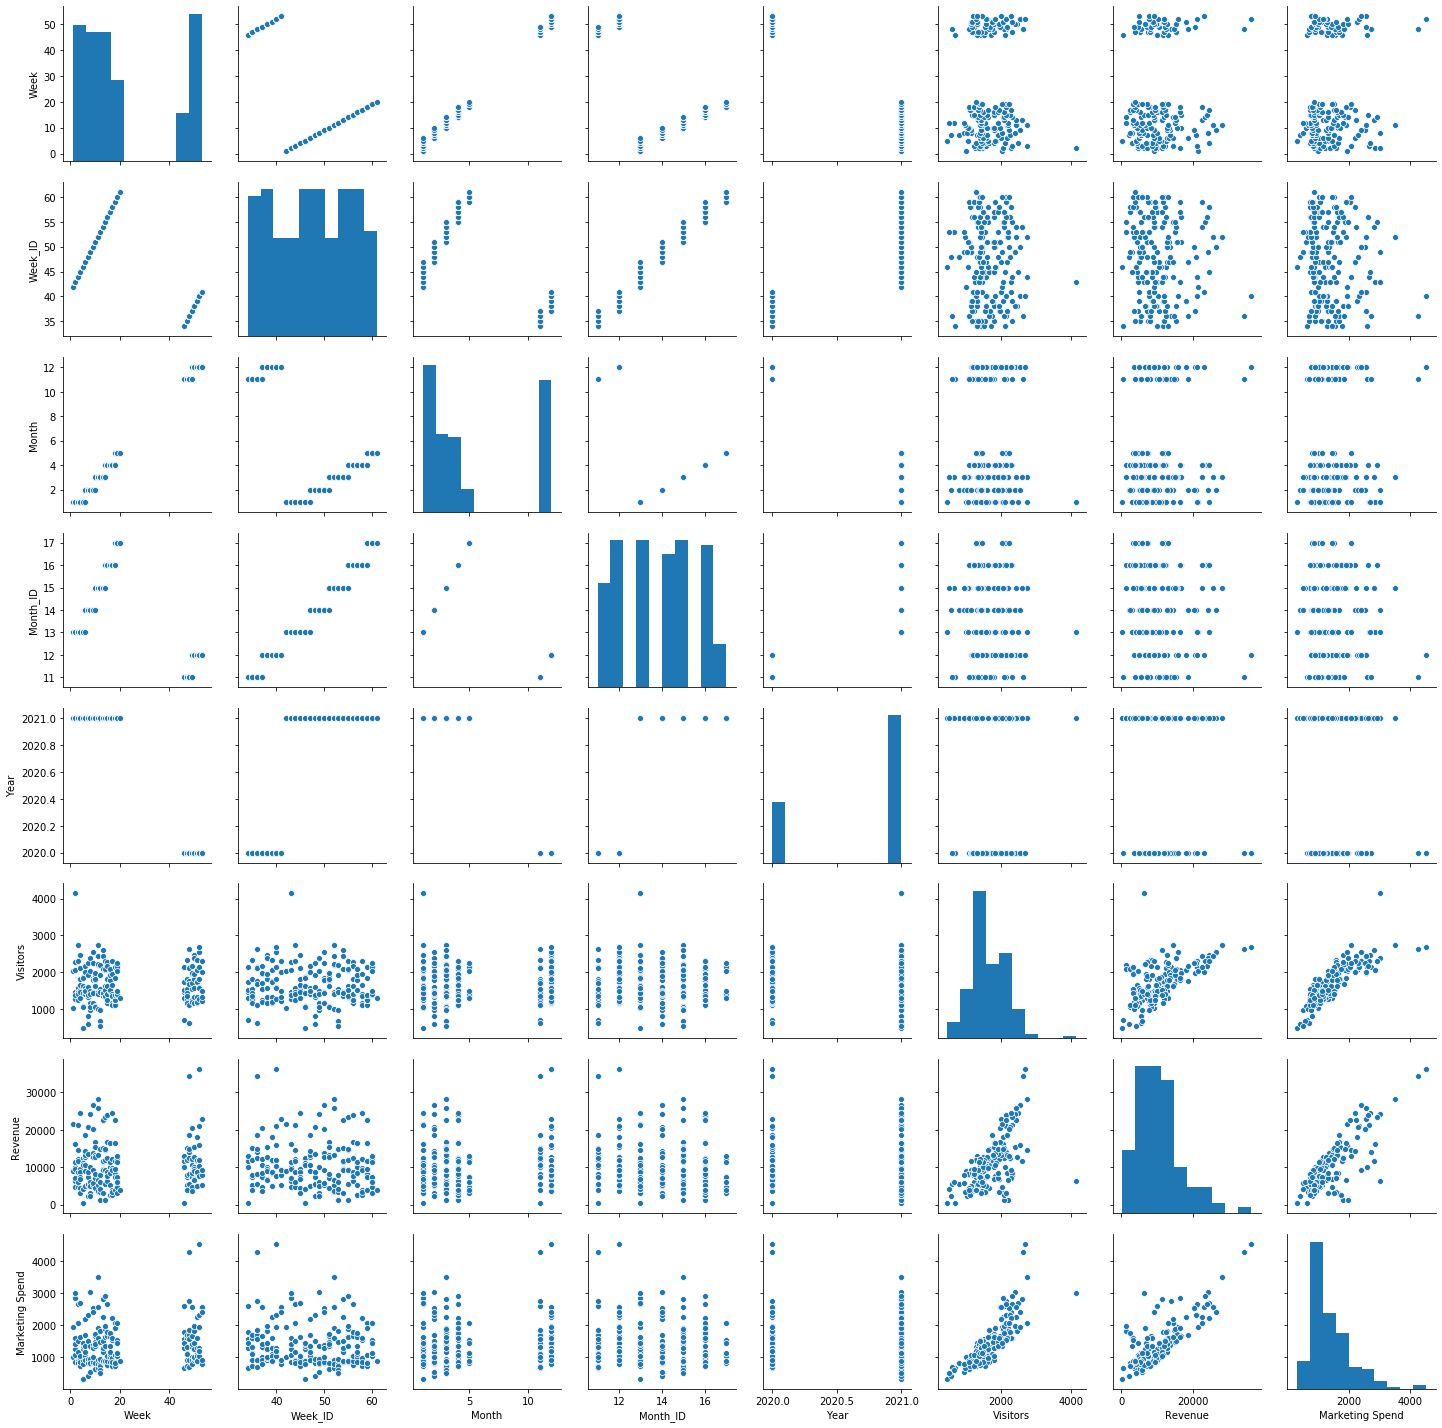

In [18]:
# Visualize the data using seaborn Pairplots to investigate relationships

sns.pairplot(df_regression)

# Notes: Do not run this on a big dataset. Filter the columns first

In [19]:
df_regression.columns

Index(['Date', 'Week', 'Week_ID', 'Month', 'Month_ID', 'Year', 'Day_Name',
       'Visitors', 'Revenue', 'Marketing Spend', 'Promo'],
      dtype='object')

In [8]:
# Visualising a Subset of our data - important features

dfc = df_regression[['Visitors', 'Revenue', 'Marketing Spend']]

dfc.head()

,Visitors,Revenue,Marketing Spend
0,707.0,465.0,651.375
1,1455.0,10386.0,1298.250
2,1520.0,12475.0,1559.375
3,1726.0,11712.0,1801.750
4,2134.0,10000.0,2614.500


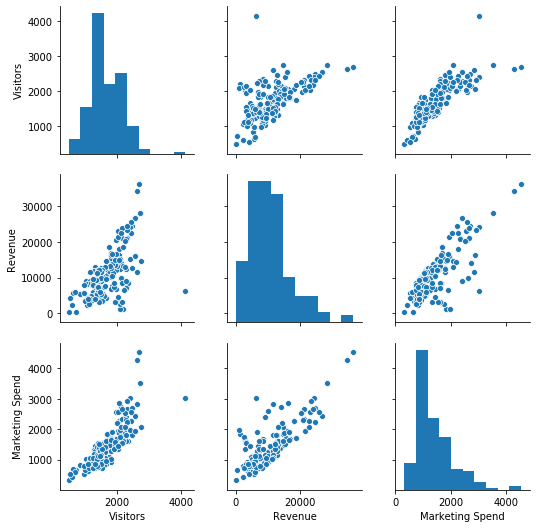

In [24]:
sns.pairplot(dfc)

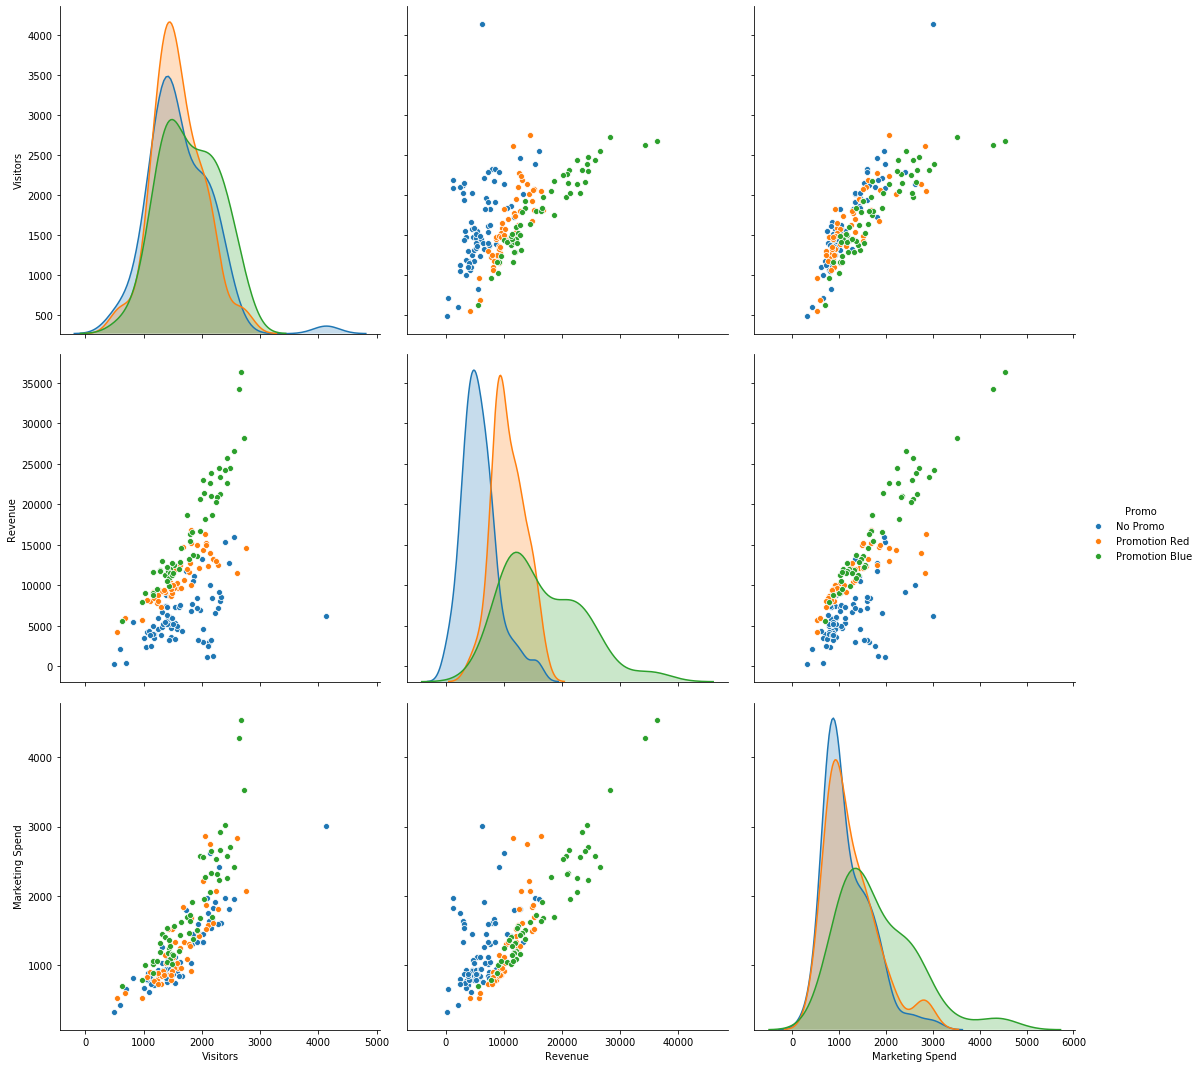

In [101]:
# Visualising a Subset of our data - with important features like 'Visitors', 'Revenue', 'Marketing Spend'& 'Promo'

sns.pairplot(df_regression[['Visitors', 'Revenue', 'Marketing Spend', 'Promo']], hue='Promo', height=5)

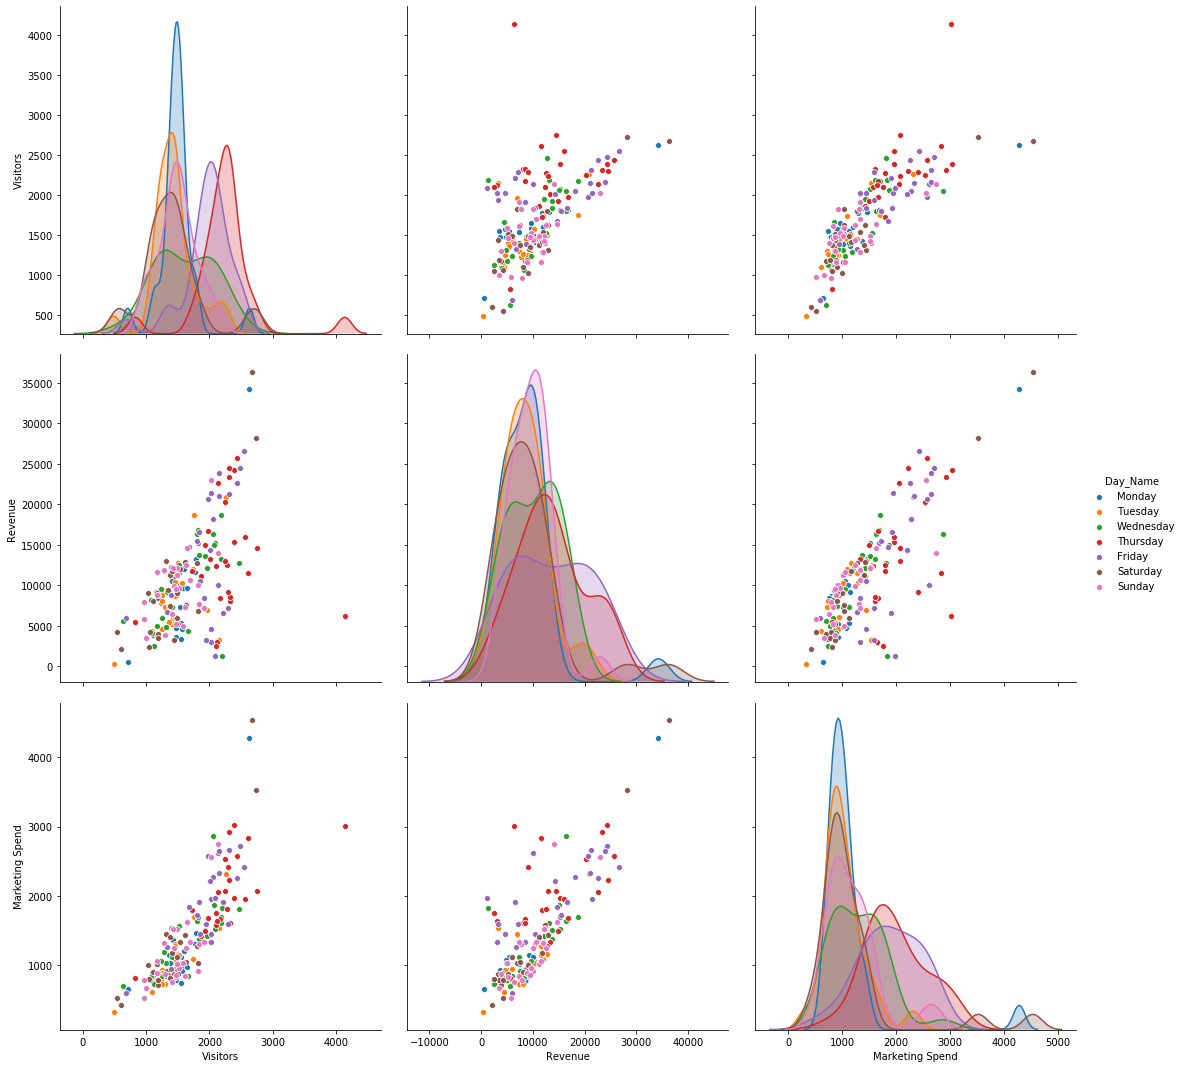

In [30]:
# Visualising a Subset of our data - with important features like 'Visitors', 'Revenue', 'Marketing Spend'& 'Day_Name'

sns.pairplot(df_regression[['Visitors', 'Revenue', 'Marketing Spend', 'Day_Name']], hue='Day_Name', height=5)

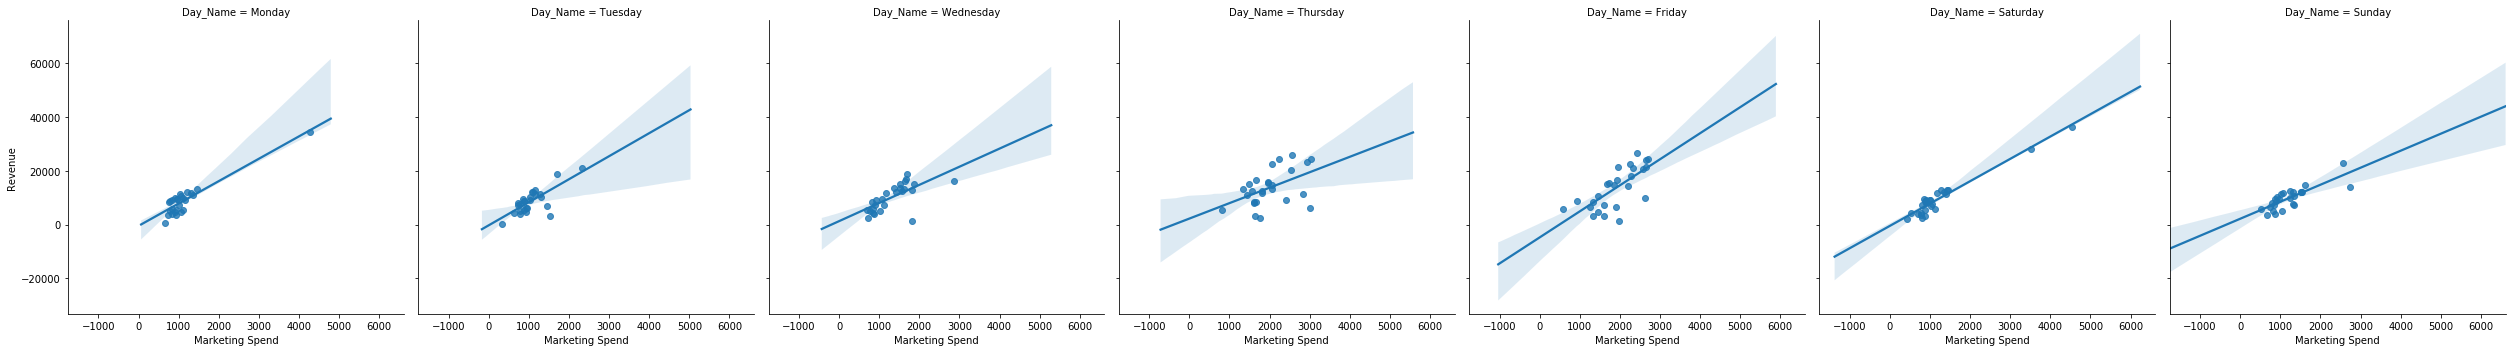

In [38]:
# Visualising a Subset of our data - important features

ax = sns.lmplot(x="Marketing Spend", y="Revenue", data=df_regression, col='Day_Name')

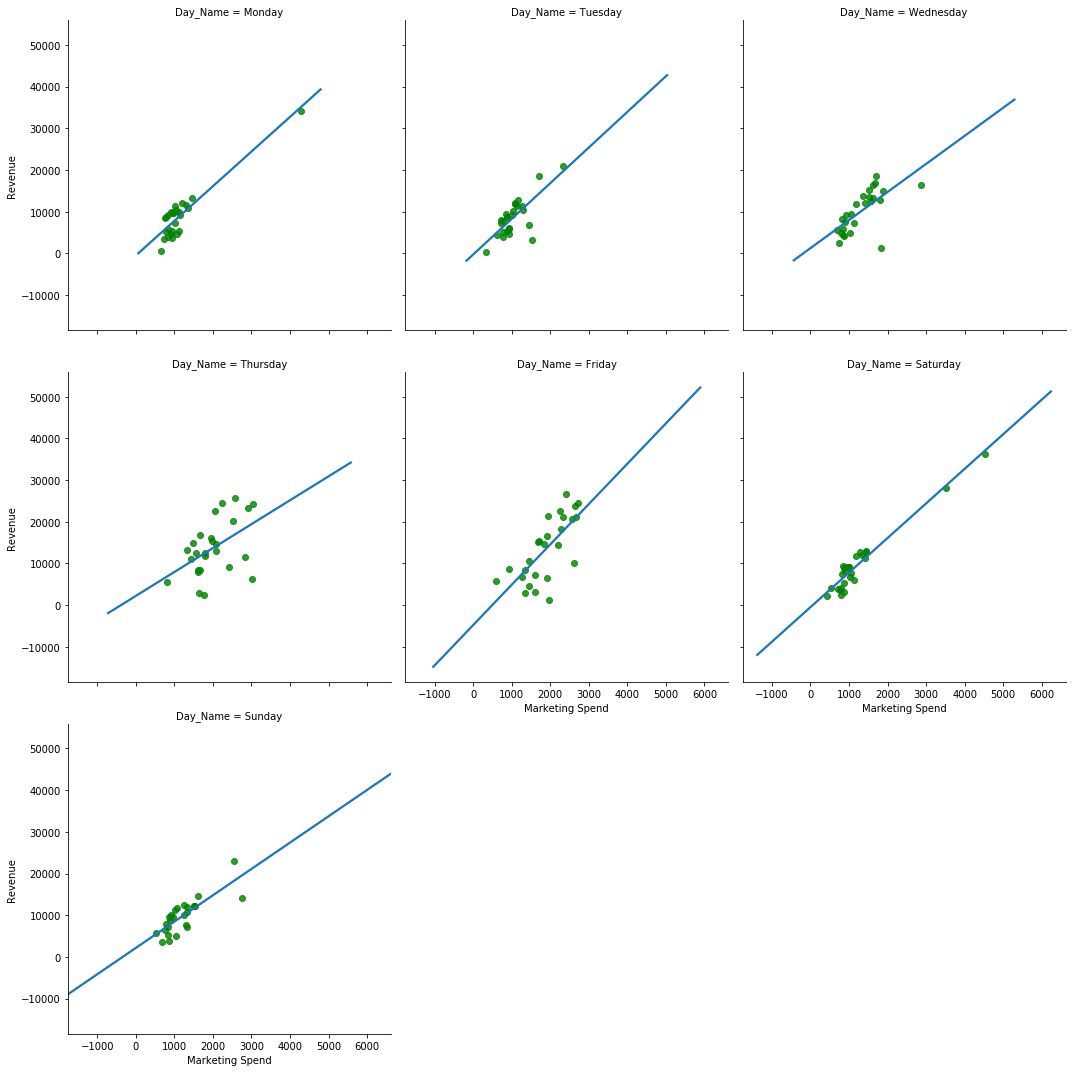

In [41]:
# Visualising the above visualization in a more clearer picture

ax = sns.lmplot(x="Marketing Spend", y="Revenue", data=df_regression, col='Day_Name', col_wrap=3, height=5, ci=False,
               scatter_kws={'color':'green'})

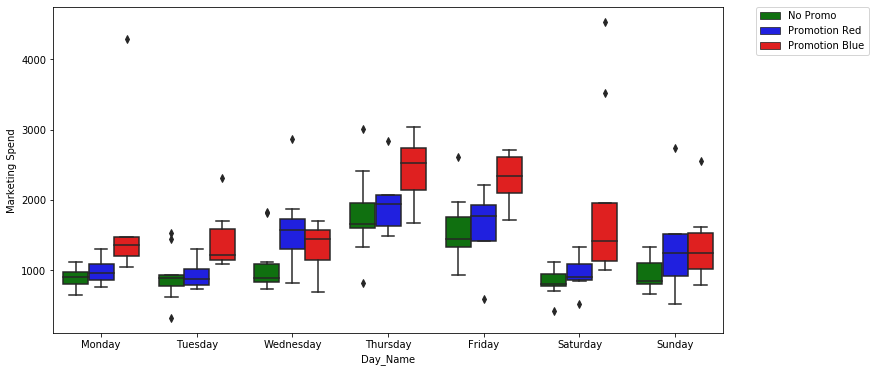

In [9]:
# Investigate the distribution of Revenue by Categorical Variables

plt.figure(figsize=(12,6))
pal=['green', 'blue', 'red']

sns.boxplot(x="Day_Name", y="Marketing Spend", data=df_regression, hue='Promo', palette=pal)
# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
               
#ax = sns.swarmplot(x = 'Day_Name', y = 'Revenue', data = raw_data, palette = pal, hue = 'Promo')

### Data Cleaning

In [12]:
# Deleting outliers
df = df_regression[df_regression['Revenue']<27000]

print(df.shape)

(179, 11)


In [56]:
df.columns

Index(['Date', 'Week', 'Week_ID', 'Month', 'Month_ID', 'Year', 'Day_Name',
       'Visitors', 'Revenue', 'Marketing Spend', 'Promo'],
      dtype='object')

In [13]:
# Selecting usefull columns only

dfc = df[['Day_Name','Visitors', 'Revenue', 'Marketing Spend', 'Promo']]

print(dfc.shape)
#visualize the raw data
dfc.head()

(179, 5)


,Day_Name,Visitors,Revenue,Marketing Spend,Promo
0,Monday,707.0,465.0,651.375,No Promo
1,Tuesday,1455.0,10386.0,1298.250,Promotion Red
2,Wednesday,1520.0,12475.0,1559.375,Promotion Blue
3,Thursday,1726.0,11712.0,1801.750,No Promo
4,Friday,2134.0,10000.0,2614.500,No Promo


In [14]:
# Converting categorical variables 'Promo' into numeric representation because the algorithm cannot calculate strings/object
new_dfc = pd.get_dummies(dfc, columns = ['Promo', 'Day_Name'])

# Notes:
# We can also do this with Label Encoding and OneHotEncoder from the preprocessing library

# Visualizing the data
new_dfc.head()

,Visitors,Revenue,Marketing Spend,Promo_No Promo,Promo_Promotion Blue,Promo_Promotion Red,Day_Name_Friday,Day_Name_Monday,Day_Name_Saturday,Day_Name_Sunday,Day_Name_Thursday,Day_Name_Tuesday,Day_Name_Wednesday
0,707.0,465.0,651.375,1,0,0,0,1,0,0,0,0,0
1,1455.0,10386.0,1298.250,0,0,1,0,0,0,0,0,1,0
2,1520.0,12475.0,1559.375,0,1,0,0,0,0,0,0,0,1
3,1726.0,11712.0,1801.750,1,0,0,0,0,0,0,1,0,0
4,2134.0,10000.0,2614.500,1,0,0,1,0,0,0,0,0,0


## Feature Selection

In this example, we do not have many variables so we should use all of the data but in some cases, you have thousands of variables and you will need to filter them in order to save computational time

2 ways to help us select the important features are: Correlation and Feature Importance

In [15]:
new_dfc[['Visitors', 'Revenue', 'Marketing Spend']].corr()

,Visitors,Revenue,Marketing Spend
Visitors,1.000000,0.531602,0.837313
Revenue,0.531602,1.000000,0.725675
Marketing Spend,0.837313,0.725675,1.000000


### Notes

corr() is used to find the pairwise correlation of all columns in the dataframe. Any null values are automatically excluded

The closer to 1 or -1 the better. As one variable increases, the other variable tends to also increase / decrease

0.8 +- is Strong Correlation, 0.6 to 0.8 +- is moderate Correlation & the other values, there is no correlation

More Info here: https://statisticsbyjim.com/basics/correlations/

### Visualizing Correlation with a Heatmap

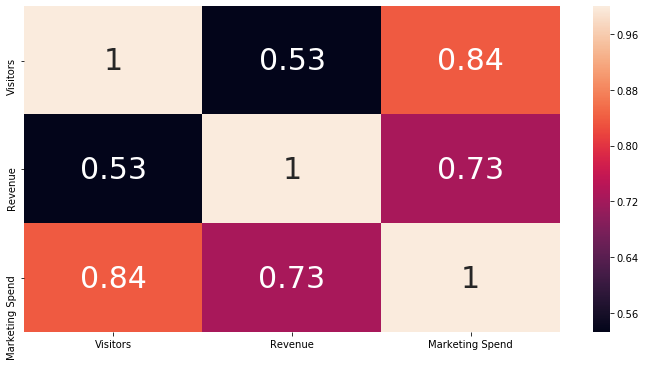

In [112]:
plt.figure(figsize=(12,6))

sns.heatmap(new_dfc[['Visitors', 'Revenue', 'Marketing Spend']].corr(), annot=True, annot_kws={'size':30})

### Steps of Running Feature Importance

Split the data into X & y

Run a Tree-based estimators (i.e. decision trees & random forests)

Run Feature Importance

In [75]:
new_dfc.columns

Index(['Visitors', 'Revenue', 'Marketing Spend'], dtype='object')

## Split the data into X & y

In [16]:
X=new_dfc.drop('Revenue', axis=1)

y=new_dfc['Revenue']

print(X.shape)
print(y.shape)

(179, 12)
(179,)


### Run a Tree-based estimators (i.e. decision trees & random forests)

In [17]:
# Run a Tree-based estimators (i.e. decision trees & random forests)

dt = DecisionTreeClassifier(random_state=15, criterion  = 'entropy', max_depth = 10)
dt.fit(X,y)

# If you want to learn how Decesion Trees work, read here: https://www.datacamp.com/community/tutorials/decision-tree-classification-python
# Official Doc: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=15, splitter='best')

In [18]:
# Running Feature Importance to consider in our model

for i, column in enumerate(new_dfc.drop('Revenue', axis = 1)):
    print('The feature importance for {} is: {:.3f}'.format(column, dt.feature_importances_[i]))

The feature importance for Visitors is: 0.332
The feature importance for Marketing Spend is: 0.438
The feature importance for Promo_No Promo is: 0.032
The feature importance for Promo_Promotion Blue is: 0.047
The feature importance for Promo_Promotion Red is: 0.045
The feature importance for Day_Name_Friday is: 0.013
The feature importance for Day_Name_Monday is: 0.014
The feature importance for Day_Name_Saturday is: 0.013
The feature importance for Day_Name_Sunday is: 0.016
The feature importance for Day_Name_Thursday is: 0.020
The feature importance for Day_Name_Tuesday is: 0.017
The feature importance for Day_Name_Wednesday is: 0.013


### Splitting the Raw Data - Hold-out validation

In [19]:
# Splitting the Raw Data Using Hold-out validation

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Official Doc: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

(143, 12)
(36, 12)
(143,)
(36,)


### Running Linear Regression

In [20]:
# Training the Regression
lm = LinearRegression(fit_intercept = True)

lm.fit(X_train, y_train)

Yhat = lm.predict(X_train)

## Model Evaluation

In [21]:
# Model Accuracy on training dataset

print('The Accuracy  on the training dataset is: ', lm.score(X_train, y_train) )
print('The Accuracy n2  on the training dataset is: ',r2_score(y_train,Yhat) )   

print("")

# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', lm.score(X_test, y_test) )

print("")

print("")
# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,Yhat)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,lm.predict(X_test))))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,Yhat))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,lm.predict(X_test)))


print("")
# Coefficients
print('Coefficients: ', lm.coef_ )

print("")
# The Intercept
print('Intercept: ', lm.intercept_)


# R2 Link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
# RMSE Link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
# MAE Link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html

The Accuracy  on the training dataset is:  0.791949990505602
The Accuracy n2  on the training dataset is:  0.791949990505602

The Accuracy  on the testing dataset is:  0.751190386538668


The RMSE  on the training dataset is:  2618.561282656437
The RMSE  on the testing dataset is:  2340.420087349012

The MAE  on the training dataset is:  1928.0670665528867
The MAE  on the testing dataset is:  1692.3835577162292

Coefficients:  [ 9.72168996e-01  3.69561477e+00 -4.29587654e+03  3.72469059e+03
  5.71185949e+02  7.38005738e+02 -3.52308895e+02 -9.02241594e+02
 -1.55867567e+02  8.14821481e+02  1.50084913e+02 -2.92494076e+02]

Intercept:  4060.650366499687


### Notes:

The accuracy score represents the coefficient of determination ( 𝑅2 ). This is at max 1, but can be negative. It will be 0 if you predict the mean of y for all observations.

The R Square is measure of how close the data are to the fitted regression line. In this case we can say that our model explains 79% of the training data & 75% of the testing data

The RMSE is the standard deviation of the residuals. Residuals is the difference between the predicted value and the regression line. Hence RMSE is a measure of how spread your residuals are.

The mean absolute error (MAE) is the average of all the absolute errors. The absolute error is the difference between the true value (y_train) and the predicted value (y_pred).

Coeff are the weights

The intercept is the expected mean value of Y when all X=0

Text(0.5, 1.0, 'Actuals Vs Predicted Values')

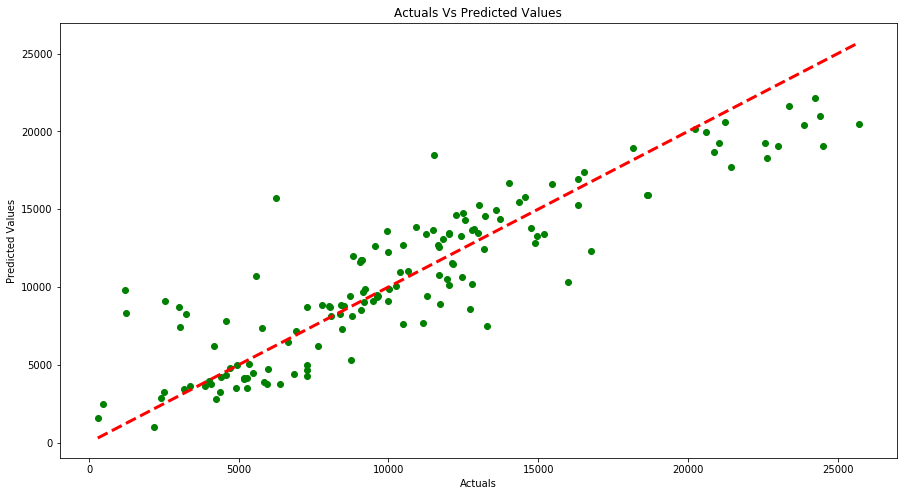

In [25]:
# Plotting Actuals Vs Predicted

plt.figure(figsize=(15,8))

plt.scatter(y_train, Yhat, c='green')

plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', c='red', lw=3)
plt.xlabel('Actuals')
plt.ylabel('Predicted Values')
plt.title('Actuals Vs Predicted Values')
# increase size

Text(0.5, 1.0, 'Actuals Vs Residuals')

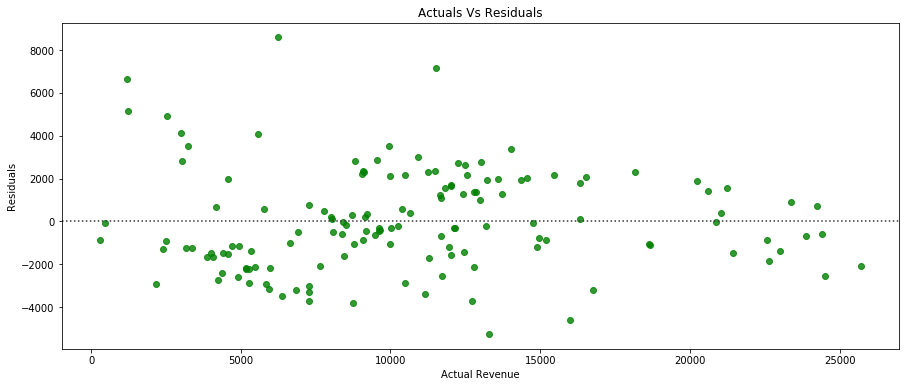

In [26]:
# Ploting Residuals

plt.figure(figsize=(15,6))

sns.residplot(y_train, Yhat, color='green')
plt.xlabel('Actual Revenue')
plt.ylabel('Residuals')
plt.title('Actuals Vs Residuals')

In [38]:
X.columns

Index(['Visitors', 'Marketing Spend', 'Promo_No Promo', 'Promo_Promotion Blue',
       'Promo_Promotion Red', 'Day_Name_Friday', 'Day_Name_Monday',
       'Day_Name_Saturday', 'Day_Name_Sunday', 'Day_Name_Thursday',
       'Day_Name_Tuesday', 'Day_Name_Wednesday'],
      dtype='object')

###### The next step should be to go back, remove more outliers and check if our model can be improved

## How to use our L. Regression model to Make Predictions

In [40]:
# Passing Coeff into a table

Coeff = lm.coef_
Coeff.shape

# Reshaping
Coeff = Coeff.reshape(-1,12)

# Creating a Dataframe
Coeff_df = pd.DataFrame(Coeff, columns = [X.columns])

# Displaying 
Coeff_df

,Visitors,Marketing Spend,Promo_No Promo,Promo_Promotion Blue,Promo_Promotion Red,Day_Name_Friday,Day_Name_Monday,Day_Name_Saturday,Day_Name_Sunday,Day_Name_Thursday,Day_Name_Tuesday,Day_Name_Wednesday
0,0.972169,3.695615,-4295.87654,3724.69059,571.185949,738.005738,-352.308895,-902.241594,-155.867567,814.821481,150.084913,-292.494076


In [41]:
# Making Predictions                        

# Variables

Day = 'Day_Name_Friday'
Visitors = 8000
Marketing_Spend = 5000
Promo = 'Promo_Promotion Red'

# Regression Formula for pred
# y = a + bx + ..   # Where y = price, a = intercept,  b = no. of Visitors and x = coefficient of marketing spend

# Prediction Calculator
pred1 = (lm.intercept_) + (Coeff_df[Day].values[0] * 1) + (Coeff_df['Visitors'].values[0] * Visitors) + (Coeff_df['Marketing Spend'].values[0] * Marketing_Spend) + (Coeff_df[Promo].values[0] * 1)

print('The predicted Revenue is: ', pred1)

The predicted Revenue is:  [31625.26784989]


In [ ]:
######################## Where we can apply this as a business and how? #######################################


# 1. We can create a prediction tool for upcoming marketing campaigns 

# 2. We can analyse past marketing campaigns and suggest what work, what did not work, 
# how much money we could have made and suggest changes - campaign optimisation

# 3. We can predict the potential of Stores or Accounts or Channels or Campaigns and compare that with what they actually achieving.
# Then we can grade them and make suggestions (over achieving vs underachieving Vs potential Accounts)

# 4. We can deploy the model in a server/cloud and automatically adjusting the campaigns that generate the most money depending on the day.
# At the same time, keep running A/B testing with new campaigns (ideas) and re-adjust if needed

In [8]:
# Exporting data back to a New Table in SQL

from sqlalchemy import create_engine

import urllib


quoted = urllib.parse.quote_plus("Driver={SQL Server Native Client 11.0};"
                     "Server=DESKTOP-H926MSV\SQLEXPRESS;"
                     "Database=All_from_Python;"
                     "Trusted_Connection=yes;")

engine = create_engine('mssql+pyodbc:///?odbc_connect={}'.format(quoted))

df_K_Means.to_sql('clusters_means', con = engine, if_exists = 'replace')